In [4]:
import pandas as pd 
import numpy as np

In [10]:
df=pd.read_csv(r"C:\Users\MSI\Desktop\Data Analysis\Data\Prime_Minister.csv")


In [ ]:
df.head() 

,Order,Name,Gender,Age_At_Start,Height_cm_estimated,Birth_Date,First_Term_Start_Date
0,1,Sir John A. Macdonald,Male,52,172,1815-01-11,1867-07-01
1,2,Alexander Mackenzie,Male,51,170,1822-01-28,1873-11-07
2,3,Sir John Abbott,Male,70,168,1821-03-12,1891-06-16
3,4,Sir John Sparrow David Thompson,Male,47,175,1845-11-10,1892-12-05
4,5,Sir Mackenzie Bowell,Male,70,169,1823-12-27,1894-12-21


In [ ]:
print("The shape of our dataset is:",df.shape) #The dataset has 7 features and 24 records

The shape of our dataset is: (24, 7)


In [9]:
print("Columns in the dataset are:",df.columns.tolist())

Columns in the dataset are: ['Order', 'Name', 'Gender', 'Age_At_Start', 'Height_cm_estimated', 'Birth_Date', 'First_Term_Start_Date']


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Order                  24 non-null     int64 
 1   Name                   24 non-null     object
 2   Gender                 24 non-null     object
 3   Age_At_Start           24 non-null     int64 
 4   Height_cm_estimated    24 non-null     int64 
 5   Birth_Date             24 non-null     object
 6   First_Term_Start_Date  24 non-null     object
dtypes: int64(3), object(4)
memory usage: 1.4+ KB


In [12]:
# Type conversions (pandas for parsing, then NumPy for numeric work)
df["Birth_Date"] = pd.to_datetime(df["Birth_Date"], errors="coerce")
df["First_Term_Start_Date"] = pd.to_datetime(df["First_Term_Start_Date"], errors="coerce")

# Ensure numeric columns are numeric
df["Age_At_Start"] = pd.to_numeric(df["Age_At_Start"], errors="coerce")
df["Height_cm_estimated"] = pd.to_numeric(df["Height_cm_estimated"], errors="coerce")

df.dtypes


Order                             int64
Name                             object
Gender                           object
Age_At_Start                      int64
Height_cm_estimated               int64
Birth_Date               datetime64[ns]
First_Term_Start_Date    datetime64[ns]
dtype: object

In [ ]:
# Missing values summary 
missing_count = df.isna().sum()
missing_percent = (df.isna().mean() * 100).round(2)
missing_summary = pd.DataFrame({"missing_count": missing_count, "missing_percent": missing_percent})
missing_summary.sort_values("missing_count", ascending=False)


,missing_count,missing_percent
Order,0,0.0
Name,0,0.0
Gender,0,0.0
Age_At_Start,0,0.0
Height_cm_estimated,0,0.0
Birth_Date,0,0.0
First_Term_Start_Date,0,0.0


In [ ]:
# 5) Duplicates in case there are some prime ministers listed more than once
dup_rows = df.duplicated().sum()
print("Duplicate rows:", dup_rows)


Duplicate rows: 0


In [ ]:
#Prepare NumPy arrays for numeric analysis
ages=df["Age_At_Start"].to_numpy(dtype=float)
heights=df["Height_cm_estimated"].to_numpy(dtype=float)

ages_clean = ages[~np.isnan(ages)]
heights_clean = heights[~np.isnan(heights)]

print("Ages array length:", len(ages_clean))
print("Heights array length:", len(heights_clean))


Ages array length: 24
Heights array length: 24


In [18]:
#  descriptive stats for AGE_AT_START
age_count = ages_clean.size
age_min = np.min(ages_clean)
age_max = np.max(ages_clean)
age_mean = np.mean(ages_clean)
age_median = np.median(ages_clean)
age_std_pop = np.std(ages_clean, ddof=0)
age_std_samp = np.std(ages_clean, ddof=1)
age_q25, age_q50, age_q75 = np.percentile(ages_clean, [25, 50, 75])

print("AGE_AT_START - NumPy stats")
print("count:", age_count)
print("min:", age_min)
print("max:", age_max)
print("mean:", round(age_mean, 2))
print("median:", age_median)
print("std (pop):", round(age_std_pop, 2))
print("std (sample):", round(age_std_samp, 2))
print("Q1:", age_q25, "Q2:", age_q50, "Q3:", age_q75)


AGE_AT_START - NumPy stats
count: 24
min: 39.0
max: 74.0
mean: 55.21
median: 54.5
std (pop): 9.52
std (sample): 9.72
Q1: 46.75 Q2: 54.5 Q3: 62.0


In [ ]:
# median height
print("Median height (cm) using NumPy:", np.median(heights_clean))


Median height (cm) using NumPy: 173.5


In [20]:
#  gender counts
genders = df["Gender"].to_numpy(dtype=str)

unique_genders, gender_counts = np.unique(genders, return_counts=True)
gender_percent = (gender_counts / gender_counts.sum() * 100).round(2)

gender_summary = pd.DataFrame({
    "Gender": unique_genders,
    "count": gender_counts,
    "percent": gender_percent
}).sort_values("count", ascending=False)

gender_summary


,Gender,count,percent
1,Male,23,95.83
0,Female,1,4.17


In [23]:
# 11) NumPy: create age ranges (bins) + counts (histogram) + matplotlib visuals

import matplotlib.pyplot as plt

# Bins: <40, 40-44, 45-49, 50-54, 55-59, 60-64, 65+
bin_edges = np.array([0, 40, 45, 50, 55, 60, 65, np.inf], dtype=float)
bin_labels = np.array(["<40", "40-44", "45-49", "50-54", "55-59", "60-64", "65+"], dtype=str)

age_hist_counts, _ = np.histogram(ages_clean, bins=bin_edges)
age_hist_percent = (age_hist_counts / age_hist_counts.sum() * 100).round(2)

age_range_summary = pd.DataFrame({
    "AgeRange": bin_labels,
    "count": age_hist_counts,
    "percent": age_hist_percent
})

age_range_summary


,AgeRange,count,percent
0,<40,1,4.17
1,40-44,1,4.17
2,45-49,7,29.17
3,50-54,3,12.50
4,55-59,4,16.67
5,60-64,2,8.33
6,65+,6,25.00


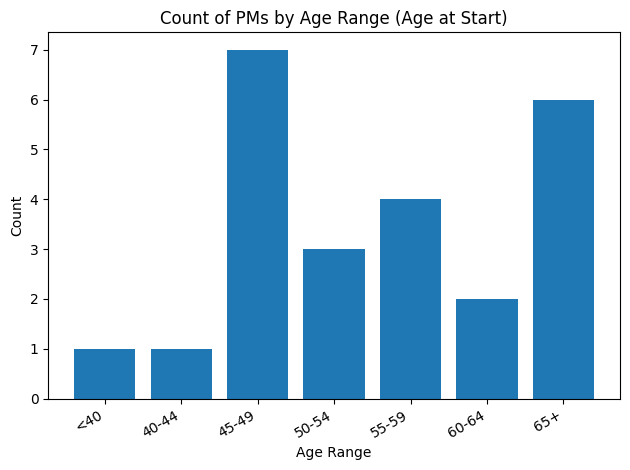

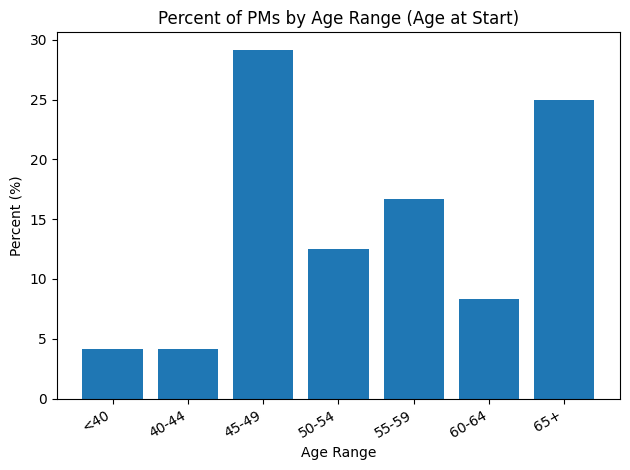

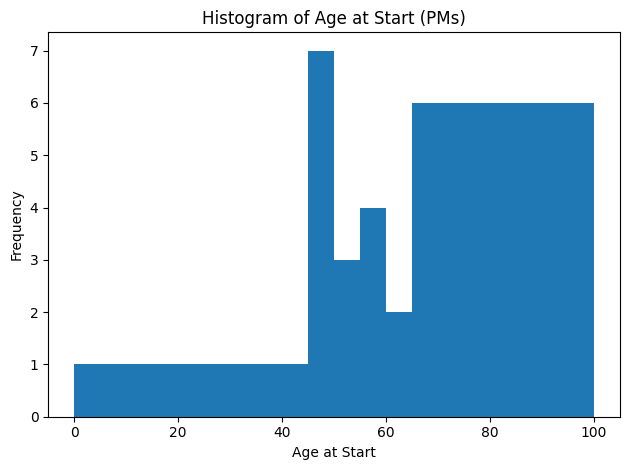

In [ ]:

plt.figure()
plt.bar(bin_labels, age_hist_counts)
plt.title("Count of PMs by Age Range (Age at Start)")
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

# Bar chart: percent per age range
plt.figure()
plt.bar(bin_labels, age_hist_percent)
plt.title("Percent of PMs by Age Range (Age at Start)")
plt.xlabel("Age Range")
plt.ylabel("Percent (%)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

# Histogram: Age_At_Start distribution (NumPy bins)
finite_edges = np.array([0, 40, 45, 50, 55, 60, 65, 100], dtype=float)  # 100 as a safe cap
plt.figure()
plt.hist(ages_clean, bins=finite_edges)
plt.title("Histogram of Age at Start (PMs)")
plt.xlabel("Age at Start")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


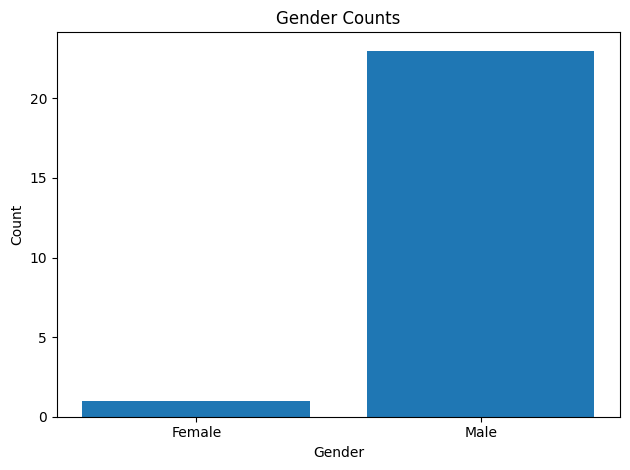

In [25]:
# Gender count bar chart (NumPy-based counts from earlier)
plt.figure()
plt.bar(unique_genders, gender_counts)
plt.title("Gender Counts")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [27]:
# Height bins (explicit intervals)
height_bin_edges = np.array([0, 165, 170, 175, 180, 185, np.inf], dtype=float)
height_bin_labels = np.array(
    ["<165", "165–169", "170–174", "175–179", "180–184", "185+"],
    dtype=str
)


In [28]:
height_hist_counts, _ = np.histogram(
    heights_clean,
    bins=height_bin_edges
)

height_hist_percent = (
    height_hist_counts / height_hist_counts.sum() * 100
).round(2)

height_range_summary = pd.DataFrame({
    "HeightRange_cm": height_bin_labels,
    "count": height_hist_counts,
    "percent": height_hist_percent
})

height_range_summary


,HeightRange_cm,count,percent
0,<165,0,0.00
1,165–169,3,12.50
2,170–174,11,45.83
3,175–179,6,25.00
4,180–184,2,8.33
5,185+,2,8.33


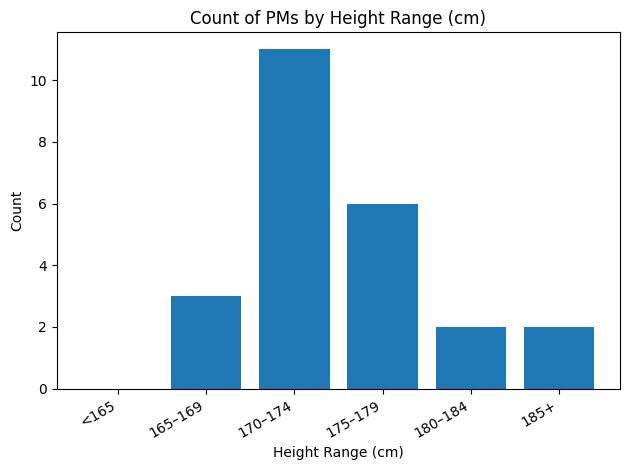

In [29]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(height_bin_labels, height_hist_counts)
plt.title("Count of PMs by Height Range (cm)")
plt.xlabel("Height Range (cm)")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


In [31]:


median_height = np.median(heights_clean)
mean_age = np.mean(ages_clean)

print("Median height (cm):", median_height)
print("Average age at start:", round(mean_age, 2))
print("Gender counts:", dict(zip(unique_genders, gender_counts)))
print("Age range counts:", dict(zip(bin_labels, age_hist_counts)))


Median height (cm): 173.5
Average age at start: 55.21
Gender counts: {np.str_('Female'): np.int64(1), np.str_('Male'): np.int64(23)}
Age range counts: {np.str_('<40'): np.int64(1), np.str_('40-44'): np.int64(1), np.str_('45-49'): np.int64(7), np.str_('50-54'): np.int64(3), np.str_('55-59'): np.int64(4), np.str_('60-64'): np.int64(2), np.str_('65+'): np.int64(6)}


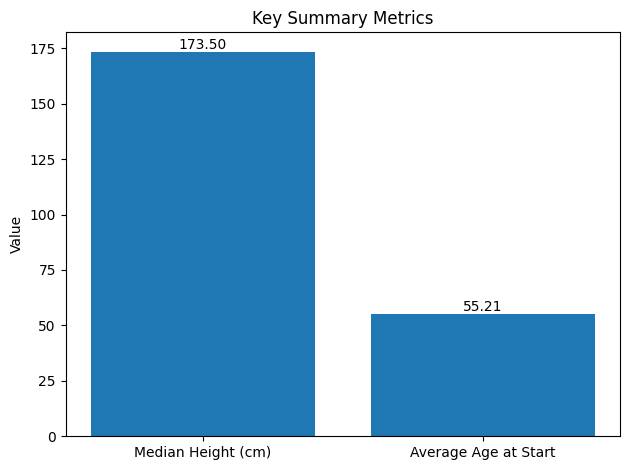

In [32]:
import matplotlib.pyplot as plt

# Values to plot
metric_labels = ["Median Height (cm)", "Average Age at Start"]
metric_values = [median_height, mean_age]

plt.figure()
bars = plt.bar(metric_labels, metric_values)

plt.title("Key Summary Metrics")
plt.ylabel("Value")

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()
